# Computer Graphics
### Maze generation

A **maze** is a complex network of paths (or passages), designed as a **puzzle** to be navigated from a starting point to a goal (exit). 
- Mazes often include **dead ends**, **loops**, and **forks** to confuse the solver.

<hr>

There are differetn types of maze. One type is the perfect maze with these properties:
- No loops (or cycles).
- There is exactly one path between any two points.
- No inaccessible areas.

One way to generate a maze (a perfect maze) is to use the **randomized depth-first search**. We have already talked about **depth-first search** (**DFS**) in repositories: **Graph-Analysis** and **Computer-Science**.
<hr>

In the following, we implement a perfect maze using a **grid-based** representation where:
- 1 represents a wall.
- 0 represents a path (an edge).

Then, the maze is generated using a randomized DFS algorithm.
<hr>

https://github.com/ostad-ai/Computer-Graphics
<br>Explanation in **English**:
    https://www.pinterest.com/HamedShahHosseini/Computer-Graphics

In [1]:
# Import required modules
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
# Define Grid size
GRID_WIDTH = 31  # Must be odd
GRID_HEIGHT = 23  # Must be odd

# Define the class Maze
class Maze:
    """
    Generate a maze using randomized Depth-First Search algorithm
    Creats a 2D numpy array as grid where:
        0 represents a path (an edge: open space)
        1 represents a wall (no edge)
    """
    def __init__(self):
        self.grid = None
        self.start = (1, 1) # Start point
        self.end = (GRID_HEIGHT-2, GRID_WIDTH-2) # End point
        self.generation_complete = False
        self.generate_maze()
    
    def generate_maze(self):
        """Generate a perfect maze using DFS."""
        # Initialize grid (1 = wall, 0 = path)
        self.grid = np.ones((GRID_HEIGHT, GRID_WIDTH), dtype=int)
        
        # Start with a grid of walls, create potential path cells
        for i in range(1, GRID_HEIGHT-1):
            for j in range(1, GRID_WIDTH-1):
                if i % 2 == 1 and j % 2 == 1:
                    self.grid[i, j] = 0
        
        # DFS maze generation
        start_y,start_x=self.start
        stack = [(start_y,start_x)]
        visited = set([(start_y,start_x)])
        
        while stack:
            current_y, current_x = stack[-1] # Peek at the top without popping
            
            # Get unvisited neighbors (2 steps away)
            neighbors = []
            for dy, dx in [(0, 2), (2, 0), (0, -2), (-2, 0)]:
                ny, nx = current_y + dy, current_x + dx
                if (1 <= ny < GRID_HEIGHT-1 and 1 <= nx < GRID_WIDTH-1 and 
                    (ny, nx) not in visited):
                    neighbors.append((ny, nx, dy//2, dx//2))
            
            if neighbors:
                # Randomly select a neighbor
                next_y, next_x, wall_dy, wall_dx = random.choice(neighbors)
                
                # Carve path by removing wall between current and next
                self.grid[current_y + wall_dy, current_x + wall_dx] = 0    
                
                # Mark the neighbor as visited and add to stack
                visited.add((next_y, next_x))
                stack.append((next_y, next_x))
            else:
                # Backtrack if no unvisited neighbors
                stack.pop()

        # Ensure start and end are open
        # Set entrance and exit
        self.grid[self.start[0], self.start[1]-1] = 0  # Entrance
        self.grid[GRID_HEIGHT-2, GRID_WIDTH-1] = 0  # Exit

In [9]:
# Create the object of class Maze and generate the maze in grid
maze=Maze()

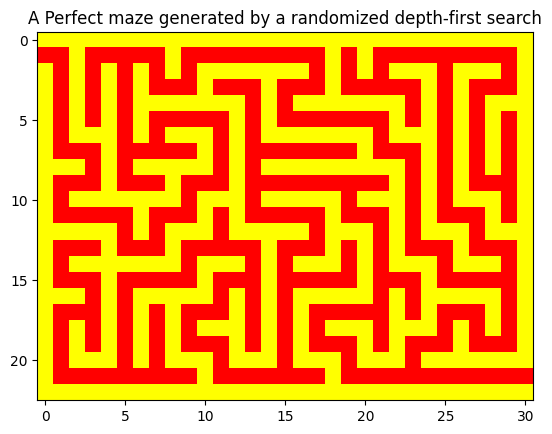

In [10]:
# Show the grid which is a 2D array of 0's ans 1's
plt.title('A Perfect maze generated by a randomized depth-first search')
plt.imshow(maze.grid,cmap=plt.cm.autumn)
plt.show()